<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 19 Class 2 02/02</h1>
</div>

## Objectives for this week:
* Data Visualizations continued

## Todays Agenda
* SQL
* Working with different data (csv, xls, json, sql)
* Inputting/outputting  data in numpy/pandas
* Ways to visualize data





<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Homework Problem</h1>
</div>

# Exercise 2

In a array $A$ of size $2N$, there are $N+1$ unique elements, and exactly one of these elements is repeated $N$ times.

Return the element repeated N times.



Example 1:  
Input: `[1,2,3,3]`
Output: `3`

Example 2:  
Input: `[2,1,2,5,3,2]`
Output: `2`

Example 3:  
Input: `[5,1,5,2,5,3,5,4]`
Output: `5`



In [3]:
def ex2(l):
    for i in l:
        if l.count(i) > 1:
            return i

try:
    assert(ex2([1,2,3,3]) == 3)
    assert(ex2([2,1,2,5,3,2]) == 2)
    assert(ex2([5,1,5,2,5,3,5,3]) == 5)
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

solution is correct


<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>SQL</h1>
</div>

In [ ]:
import sqlite3

conn = sqlite3.connect(".db")

In [67]:
# our sql script

import sqlite3
from contextlib import closing

db = 'new.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                    print("commit successful")
                else:
                    return cur
            except Exception as e:
                print(e)
    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")

pragma table_info(Robert'); DROP TABLE students;);


### `CREATE`

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (fname VARCHAR(20), lname VARCHAR(20));
```

In [69]:
db = 'new.db'

execute(db, 'CREATE TABLE tablename1 (fname VARCHAR(20) NOT NULL, lname VARCHAR(20) NOT NULL);',\
        commit=True)

commit successful


In [70]:
get_tables(db)

['tablename1']

In [71]:
get_cols(db, 'tablename1')

[(0, 'fname', 'VARCHAR(20)', 1, None, 0),
 (1, 'lname', 'VARCHAR(20)', 1, None, 0)]

### `INSERT`

```sql
-- Insert a row of data into the table tablename1. This assumes that the
-- table has been defined to accept these values as appropriate for it.
INSERT INTO tablename1 VALUES('Unknown','Person');
```

In [77]:
execute(db, "INSERT INTO tablename1 VALUES('Unknown','Person');", commit=True)

commit successful


In [78]:
execute(db, "SELECT * FROM tablename1;")

[('Unknown', 'Person'),
 ('Unknown', 'Person'),
 ('Unknown', 'Person'),
 ('Unknown', 'Person'),
 ('Unknown', 'Person'),
 ('Unknown', 'Person')]

### `UPDATE`

```sql
-- In tablename1, change the fname value to 'John' and lname value
-- to 'Doe' for all rows that have an lname value of 'Person'.
UPDATE tablename1 SET fname='John' lname='Doe' WHERE lname='Person';
```

In [79]:
execute(db, "UPDATE tablename1 SET fname='John', lname='Doe' WHERE lname='Person';", commit=True)

commit successful


In [80]:
execute(db, "SELECT * FROM tablename1;")

[('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe')]

### `DELETE`
```sql
-- Delete rows from the tablename1 table
-- where the lname value begins with 'M'.
DELETE FROM tablename1 WHERE lname like 'D%';
```

In [34]:
execute(db, "DELETE FROM tablename1 WHERE lname like 'D%';", \
        commit=True)

commit successful


In [57]:
execute(db, "SELECT * FROM tablename1;")

[('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe'),
 ('John', 'Doe')]

```sql
-- Delete all rows from the tablename1 table, leaving the empty table.
DELETE FROM tablename1;
```

In [58]:
execute(db, "DELETE FROM tablename1;", commit=True)

commit successful


In [60]:
execute(db, "SELECT * FROM tablename1;")

[]

```sql
-- Remove the entire tablename1 table.
DROP TABLE tablename1;

```

In [92]:
execute(db, "DROP TABLE tablename1;", commit=True)

commit successful


In [83]:
execute(db, "SELECT * FROM tablename1;")

no such table: tablename1


### Restarting With Primary key

We need to change our `CREATE` command:

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (
    id INTEGER PRIMARY KEY,
    fname VARCHAR(20), 
    lname VARCHAR(20)
);

```

In [88]:
# our sql script

import sqlite3
from contextlib import closing

db = 'new.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                    print("commit successful")
                else:
                    return cur
            except Exception as e:
                print(e)
    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")
    

get_tables(db)

['tablename1']

### `CREATE`

```sql
-- Create a table called tablename1, with the two columns shown, for
-- the database currently in use. Lots of other options are available
-- for how you specify the columns, such as their datatypes.
CREATE TABLE tablename1 (id INTEGER PRIMARY KEY, fname VARCHAR(20), lname VARCHAR(20));
```

In [147]:
db = 'new.db'

execute(db, 'CREATE TABLE tablename1\
            (id INTEGER PRIMARY KEY, \
             fname VARCHAR(20) NOT NULL, \
             lname VARCHAR(20) NOT NULL);',\
        commit=True)

commit successful


In [148]:
get_tables(db)

['tablename1']

### `INSERT`

```sql
-- Insert a row of data into the table tablename1. This assumes that the
-- table has been defined to accept these values as appropriate for it.
INSERT INTO tablename1 VALUES('Unknown','Person');
```

In [149]:
execute(db, "INSERT INTO tablename1 \
             VALUES(Null,'Unknown', Null);", commit=True)

NOT NULL constraint failed: tablename1.lname


In [143]:
execute(db, "SELECT * FROM tablename1;")

[(1, 'Unknown', None)]

### `UPDATE`

```sql
-- In tablename1, change the fname value to 'John' and lname value
-- to 'Doe' for all rows that have an lname value of 'Person'.
UPDATE tablename1 SET fname='John' lname='Doe' WHERE id=1;
```

In [120]:
execute(db, "UPDATE tablename1 SET fname='John', lname='Doe' WHERE id = 10;", commit=True)

commit successful


In [121]:
execute(db, "SELECT * FROM tablename1;")

[(1, 'John', 'Doe'),
 (2, 'Unknown', 'Person'),
 (3, 'Unknown', 'Person'),
 (4, 'Unknown', 'Person'),
 (5, 'Unknown', 'Person'),
 (6, 'Unknown', 'Person'),
 (10, 'John', 'Doe'),
 (11, 'Unknown', 'Person'),
 (12, 'Unknown', 'Person'),
 (13, 'Unknown', 'Person'),
 (14, 'Unknown', 'Person'),
 (15, 'Unknown', 'Person'),
 (16, 'Unknown', 'Person'),
 (17, 'Unknown', 'Person')]

### `DELETE`
```sql
-- Delete rows from the tablename1 table
-- where the lname value begins with 'M'.
DELETE FROM tablename1 WHERE id=3;
```

In [124]:
execute(db, "DELETE FROM tablename1 WHERE id > 3;", \
        commit=True)

commit successful


In [126]:
execute(db, "SELECT * FROM tablename1;")

[(1, 'John', 'Doe'), (2, 'Unknown', 'Person')]

```sql
-- Delete all rows from the tablename1 table, leaving the empty table.
DELETE FROM tablename1;
```

In [144]:
execute(db, "DELETE FROM tablename1;", commit=True)

commit successful


In [128]:
execute(db, "SELECT * FROM tablename1;")

[]

```sql
-- Remove the entire tablename1 table.
DROP TABLE tablename1;

```

In [145]:
execute(db, "DROP TABLE tablename1;", commit=True)

commit successful


In [146]:
execute(db, "SELECT * FROM tablename1;")

no such table: tablename1


# Using SQL with pandas

### Importing from an sql db

We'll need to import our libraries and connect to our db.

In [152]:
import pandas as pd
import sqlite3 as sql

In [153]:
def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

In [181]:
db = '../datasets/chinook.db'
conn = connection(db)

In [155]:
conn

Then we can use `read_sql` to connect to our database.

`read_sql(query, conn)`

We'll need to pass in an SQL query to get information and the db connection.

In [157]:
help(pd.read_sql_table)

Help on function read_sql_table in module pandas.io.sql:

read_sql_table(table_name, con, schema=None, index_col=None, coerce_float=True, parse_dates=None, columns=None, chunksize: Optional[int] = None) -> Union[pandas.core.frame.DataFrame, Iterator[pandas.core.frame.DataFrame]]
    Read SQL database table into a DataFrame.
    
    Given a table name and a SQLAlchemy connectable, returns a DataFrame.
    This function does not support DBAPI connections.
    
    Parameters
    ----------
    table_name : str
        Name of SQL table in database.
    con : SQLAlchemy connectable or str
        A database URI could be provided as str.
        SQLite DBAPI connection mode not supported.
    schema : str, default None
        Name of SQL schema in database to query (if database flavor
        supports this). Uses default schema if None (default).
    index_col : str or list of str, optional, default: None
        Column(s) to set as index(MultiIndex).
    coerce_float : bool, default Tru

In [182]:
employees = pd.read_sql("SELECT * from employees", conn)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [183]:
customers = pd.read_sql("SELECT * from customers", conn)
customers

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [167]:
new_customers = customers[["FirstName", "LastName", "Company", "Address", "City", "State", "Country", "Phone", "Email"]]
new_customers.head()

,FirstName,LastName,Company,Address,City,State,Country,Phone,Email
0,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,+55 (12) 3923-5555,luisg@embraer.com.br
1,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,+49 0711 2842222,leonekohler@surfeu.de
2,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,+1 (514) 721-4711,ftremblay@gmail.com
3,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,+47 22 44 22 22,bjorn.hansen@yahoo.no
4,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,+420 2 4172 5555,frantisekw@jetbrains.com


In [ ]:
help(new_customers.to_sql)

In [180]:
new_db = 'new_db.db'
conn = connection(new_db)
new_customers.to_sql('customers', conn)

ValueError: Table 'customers' already exists.

In [179]:
get_cols(new_db, 'customers')

[(0, 'index', 'INTEGER', 0, None, 0),
 (1, 'FirstName', 'TEXT', 0, None, 0),
 (2, 'LastName', 'TEXT', 0, None, 0),
 (3, 'Company', 'TEXT', 0, None, 0),
 (4, 'Address', 'TEXT', 0, None, 0),
 (5, 'City', 'TEXT', 0, None, 0),
 (6, 'State', 'TEXT', 0, None, 0),
 (7, 'Country', 'TEXT', 0, None, 0),
 (8, 'Phone', 'TEXT', 0, None, 0),
 (9, 'Email', 'TEXT', 0, None, 0)]

In [178]:
execute(new_db, 'SELECT * from customers')

[(0,
  'Luís',
  'Gonçalves',
  'Embraer - Empresa Brasileira de Aeronáutica S.A.',
  'Av. Brigadeiro Faria Lima, 2170',
  'São José dos Campos',
  'SP',
  'Brazil',
  '+55 (12) 3923-5555',
  'luisg@embraer.com.br'),
 (1,
  'Leonie',
  'Köhler',
  None,
  'Theodor-Heuss-Straße 34',
  'Stuttgart',
  None,
  'Germany',
  '+49 0711 2842222',
  'leonekohler@surfeu.de'),
 (2,
  'François',
  'Tremblay',
  None,
  '1498 rue Bélanger',
  'Montréal',
  'QC',
  'Canada',
  '+1 (514) 721-4711',
  'ftremblay@gmail.com'),
 (3,
  'Bjørn',
  'Hansen',
  None,
  'Ullevålsveien 14',
  'Oslo',
  None,
  'Norway',
  '+47 22 44 22 22',
  'bjorn.hansen@yahoo.no'),
 (4,
  'František',
  'Wichterlová',
  'JetBrains s.r.o.',
  'Klanova 9/506',
  'Prague',
  None,
  'Czech Republic',
  '+420 2 4172 5555',
  'frantisekw@jetbrains.com'),
 (5,
  'Helena',
  'Holý',
  None,
  'Rilská 3174/6',
  'Prague',
  None,
  'Czech Republic',
  '+420 2 4177 0449',
  'hholy@gmail.com'),
 (6,
  'Astrid',
  'Gruber',
  None,
 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt


# The Lifecycle of a Matplotlib Plot


This tutorial aims to show the beginning, middle, and end of a single
visualization using Matplotlib. We'll begin with some raw data and
end by saving a figure of a customized visualization. Along the way we try
to highlight some neat features and best-practices using Matplotlib.

A note on the Object-Oriented API vs. Pyplot
============================================

Matplotlib has two interfaces. The first is an object-oriented (OO)
interface. In this case, we utilize an instance of `axes.Axes`
in order to render visualizations on an instance of `figure.Figure`.

The second is based on MATLAB and uses a state-based interface. This is
encapsulated in the `.pyplot` module. 

Most of the terms are straightforward but the main thing to remember
is that:

* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word
  "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives
us much more flexibility and power in customizing our plot.

<p>In general, try to use the object-oriented interface over the pyplot
   interface.</p>

Our data
========

We'll use the data from the post from which this tutorial was derived.
It contains sales information for a number of companies.


In [203]:
import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

Getting started
===============

This data is naturally visualized as a barplot, with one bar per
group. To do this with the object-oriented approach, we first generate
an instance of :class:`figure.Figure` and
:class:`axes.Axes`. The Figure is like a canvas, and the Axes
is a part of that canvas on which we will make a particular visualization.

<h4>Note</h4><p>Figures can have multiple axes on them.</p></div>



In [186]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

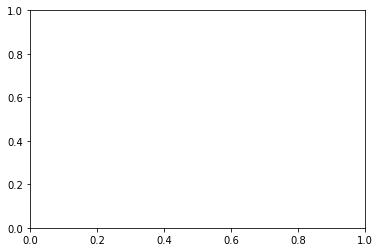

In [192]:
fig, ax = plt.subplots()


Now that we have an Axes instance, we can plot on top of it.



<BarContainer object of 10 artists>

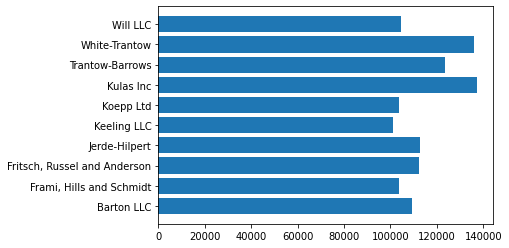

In [209]:
fig, ax1 = plt.subplots()
ax1.barh(group_names, group_data)

Controlling the style
=====================

There are many styles available in Matplotlib in order to let you tailor
your visualization to your needs. To see a list of styles, we can use
`.style`.



In [194]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


You can activate a style with the following:



In [210]:
plt.style.use('fivethirtyeight')

Now let's remake the above plot to see how it looks:



<BarContainer object of 10 artists>

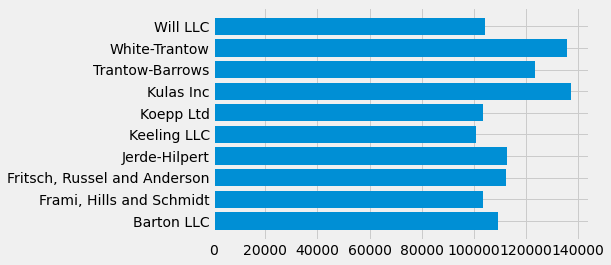

In [211]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

The style controls many things, such as color, linewidths, backgrounds,
etc.

Customizing the plot
====================

Now we've got a plot with the general look that we want, so let's fine-tune
it so that it's ready for print. First let's rotate the labels on the x-axis
so that they show up more clearly. We can gain access to these labels
with the `axes.Axes.get_xticklabels` method:



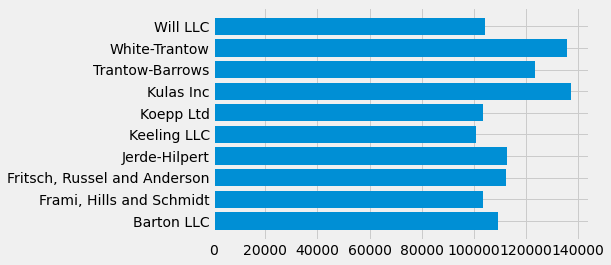

In [212]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

If we'd like to set the property of many items at once, it's useful to use
the `pyplot.setp` function. This will take a list (or many lists) of
Matplotlib objects, and attempt to set some style element of each one.



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

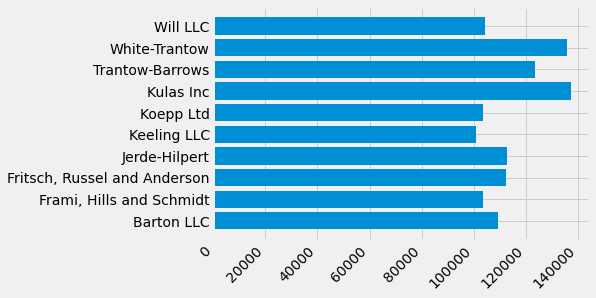

In [216]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

It looks like this cut off some of the labels on the bottom. We can
tell Matplotlib to automatically make room for elements in the figures
that we create. To do this we set the ``autolayout`` value of our
rcParams. .



In [ ]:
help(plt.rcParams)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

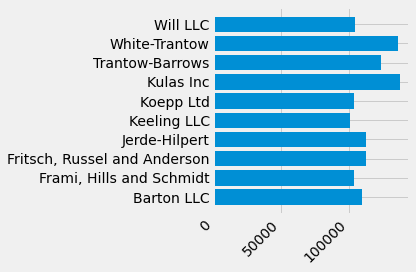

In [218]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Next, we add labels to the plot. To do this with the OO interface,
we can use the `.Artist.set` method to set properties of this
Axes object.



[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

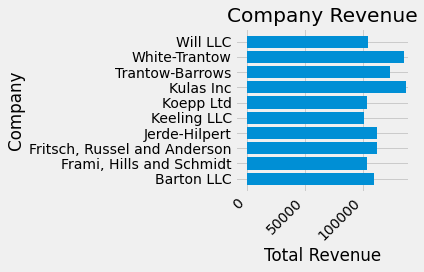

In [221]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

We can also adjust the size of this plot using the `pyplot.subplots`
function. We can do this with the ``figsize`` kwarg.

<h4>Note</h4><p>While indexing in NumPy follows the form (row, column), the figsize
   kwarg follows the form (width, height). This follows conventions in
   visualization, which unfortunately are different from those of linear
   algebra.</p></div>



In [224]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``Figure.number`` attribute, otherwise, an
        auto-generated integer value is used (starting at 1 and incremented
        for each new figure). If *num* is a string, the figure label and the
        window title is s

[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

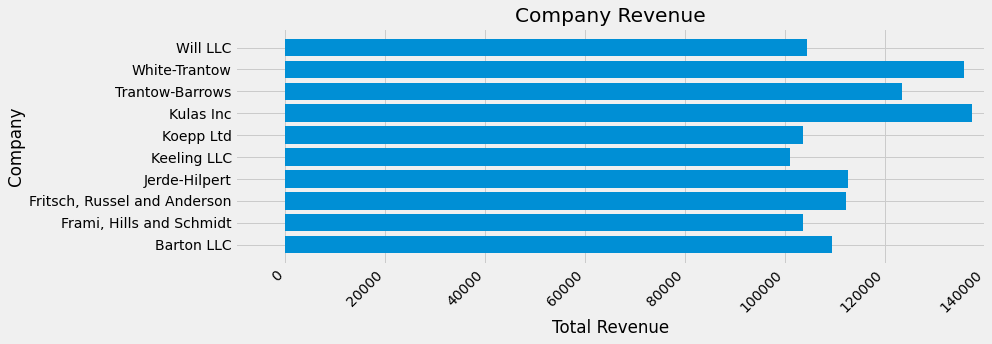

In [231]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

For labels, we can specify custom formatting guidelines in the form of
functions. Below we define a function that takes an integer as input, and
returns a string as an output. When used with `.Axis.set_major_formatter` or
`.Axis.set_minor_formatter`, they will automatically create and use a
`ticker.FuncFormatter` class.

For this function, the ``x`` argument is the original tick label and ``pos``
is the tick position.  We will only use ``x`` here but both arguments are
needed.



In [232]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

We can then apply this function to the labels on our plot. To do this,
we use the ``xaxis`` attribute of our axes. This lets you perform
actions on a specific axis on our plot.



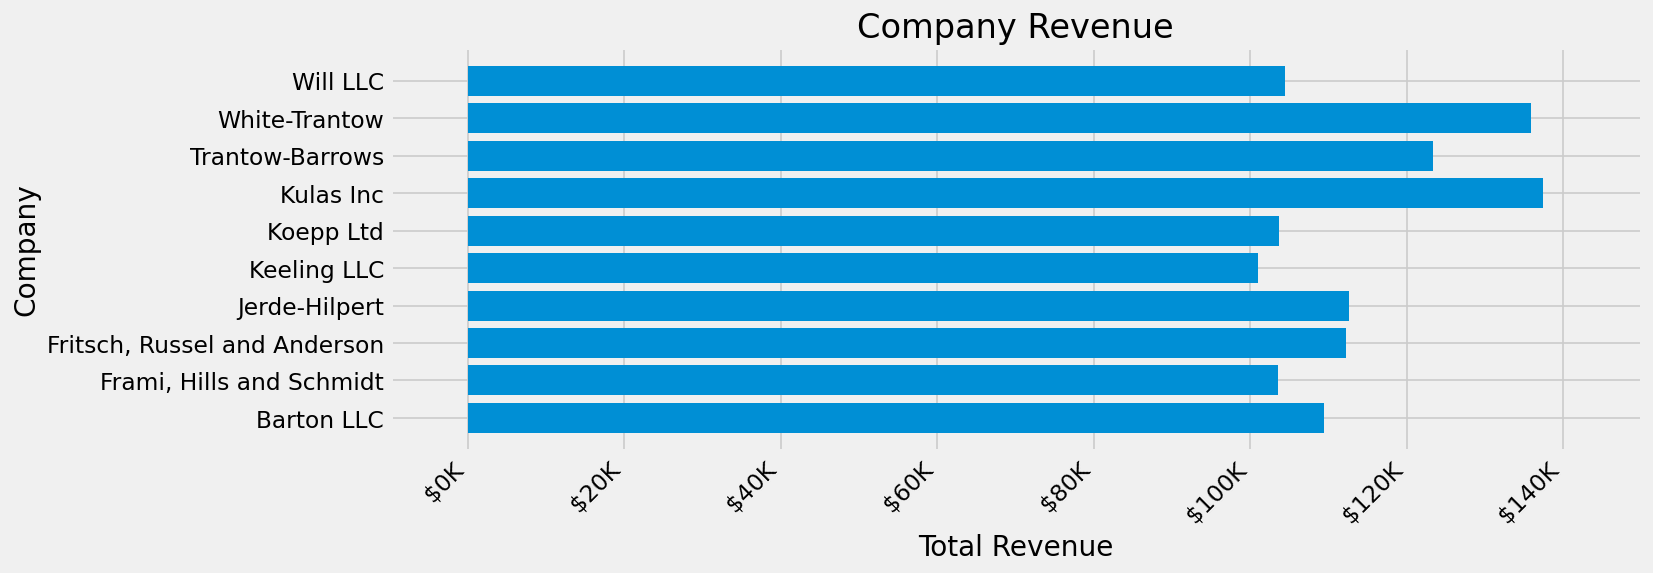

In [238]:
fig, ax = plt.subplots(figsize=(14, 5), dpi=120)
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 150000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

Combining multiple visualizations
=================================

It is possible to draw multiple plot elements on the same instance of
`axes.Axes`. To do this we simply need to call another one of
the plot methods on that axes object.



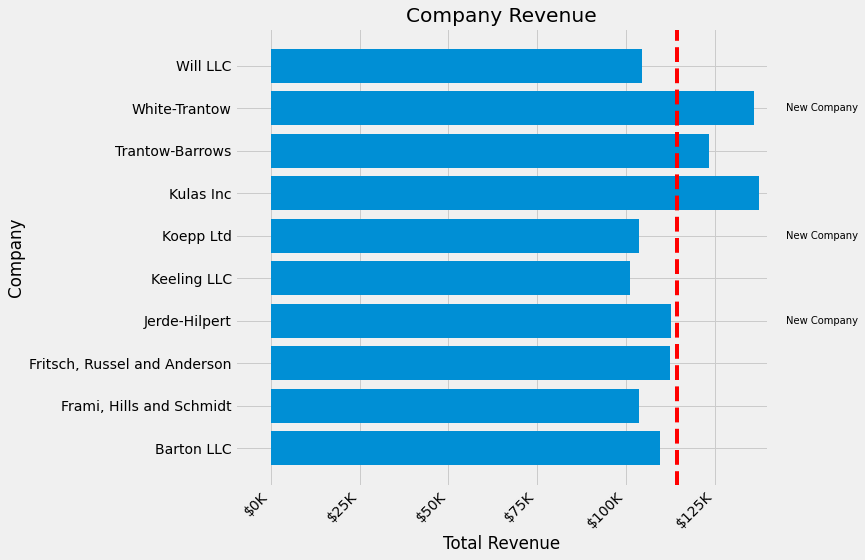

In [247]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.95)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

250000.0

Saving our plot
===============

Now that we're happy with the outcome of our plot, we want to save it to
disk. There are many file formats we can save to in Matplotlib. To see
a list of available options, use:



In [248]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


We can then use the `figure.Figure.savefig` in order to save the figure
to disk. Note that there are several useful flags we show below:

* ``transparent=True`` makes the background of the saved figure transparent
  if the format supports it.
* ``dpi=80`` controls the resolution (dots per square inch) of the output.
* ``bbox_inches="tight"`` fits the bounds of the figure to our plot.



In [ ]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

Intro to pyplot
===============

`matplotlib.pyplot` is a collection of functions
that make matplotlib work like MATLAB.
Each ``pyplot`` function makes
some change to a figure: e.g., creates a figure, creates a plotting area
in a figure, plots some lines in a plotting area, decorates the plot
with labels, etc.

In `matplotlib.pyplot` various states are preserved
across function calls, so that it keeps track of things like
the current figure and plotting area, and the plotting
functions are directed to the current axes (please note that "axes" here
and in most places in the documentation refers to the *axes*
`part of a figure <figure_parts>`
and not the strict mathematical term for more than one axis).

Generating visualizations with pyplot is very quick:



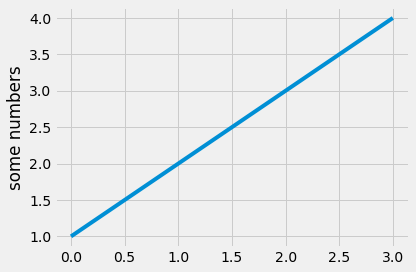

In [249]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis
from 1-4.  If you provide a single list or array to
`~.pyplot.plot`, matplotlib assumes it is a
sequence of y values, and automatically generates the x values for
you.  Since python ranges start with 0, the default x vector has the
same length as y but starts with 0.  Hence the x data are
``[0, 1, 2, 3]``.

`~.pyplot.plot` is a versatile function, and will take an arbitrary number of
arguments.  For example, to plot x versus y, you can write:



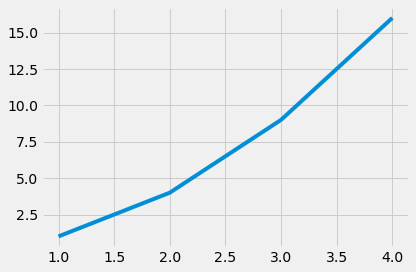

In [250]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Formatting the style of your plot
---------------------------------

For every x, y pair of arguments, there is an optional third argument
which is the format string that indicates the color and line type of
the plot.  The letters and symbols of the format string are from
MATLAB, and you concatenate a color string with a line style string.
The default format string is 'b-', which is a solid blue line.  For
example, to plot the above with red circles, you would issue



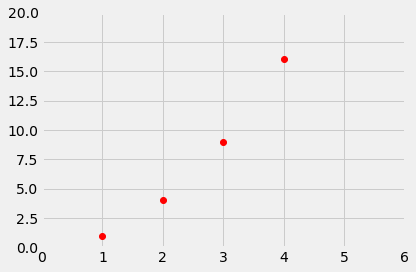

In [251]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the `~.pyplot.plot` documentation for a complete
list of line styles and format strings.  The
`~.pyplot.axis` function in the example above takes a
list of ``[xmin, xmax, ymin, ymax]`` and specifies the viewport of the
axes.

If matplotlib were limited to working with lists, it would be fairly
useless for numeric processing.  Generally, you will use `numpy
<http://www.numpy.org>`_ arrays.  In fact, all sequences are
converted to numpy arrays internally.  The example below illustrates
plotting several lines with different format styles in one function call
using arrays.



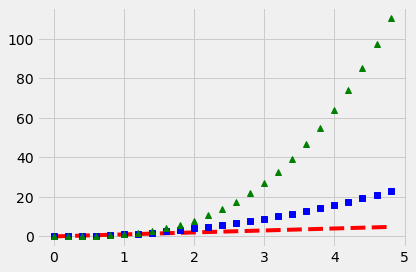

In [252]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()


Plotting with keyword strings
=============================

There are some instances where you have data in a format that lets you
access particular variables with strings. For example, with
`numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with
the ``data`` keyword argument. If provided, then you may generate plots with
the strings corresponding to these variables.



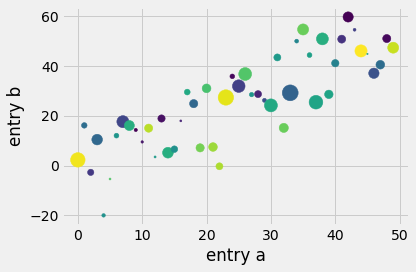

In [253]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


Plotting with categorical variables
===================================

It is also possible to create a plot using categorical variables.
Matplotlib allows you to pass categorical variables directly to
many plotting functions. For example:



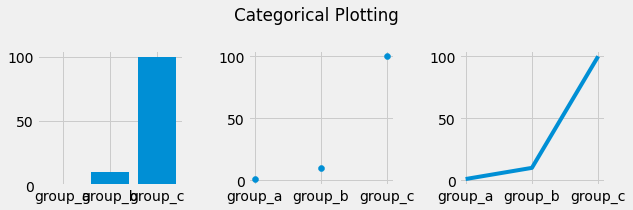

In [254]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


Controlling line properties
===========================

Lines have many attributes that you can set: linewidth, dash style,
antialiased, etc; see `matplotlib.lines.Line2D`.  There are
several ways to set line properties

* Use keyword args::

      plt.plot(x, y, linewidth=2.0)


* Use the setter methods of a ``Line2D`` instance.  ``plot`` returns a list
  of ``Line2D`` objects; e.g., ``line1, line2 = plot(x1, y1, x2, y2)``.  In the code
  below we will suppose that we have only
  one line so that the list returned is of length 1.  We use tuple unpacking with
  ``line,`` to get the first element of that list::

      line, = plt.plot(x, y, '-')
      line.set_antialiased(False) # turn off antialiasing

* Use `~.pyplot.setp`.  The example below
  uses a MATLAB-style function to set multiple properties
  on a list of lines.  ``setp`` works transparently with a list of objects
  or a single object.  You can either use python keyword arguments or
  MATLAB-style string/value pairs::

      lines = plt.plot(x1, y1, x2, y2)
      # use keyword args
      plt.setp(lines, color='r', linewidth=2.0)
      # or MATLAB style string value pairs
      plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

```
Here are the available `~.lines.Line2D` properties.

======================  ==================================================
Property                Value Type
======================  ==================================================
alpha                   float
animated                [True | False]
antialiased or aa       [True | False]
clip_box                a matplotlib.transform.Bbox instance
clip_on                 [True | False]
clip_path               a Path instance and a Transform instance, a Patch
color or c              any matplotlib color
contains                the hit testing function
dash_capstyle           [``'butt'`` | ``'round'`` | ``'projecting'``]
dash_joinstyle          [``'miter'`` | ``'round'`` | ``'bevel'``]
dashes                  sequence of on/off ink in points
data                    (np.array xdata, np.array ydata)
figure                  a matplotlib.figure.Figure instance
label                   any string
linestyle or ls         [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'steps'`` | ...]
linewidth or lw         float value in points
marker                  [ ``'+'`` | ``','`` | ``'.'`` | ``'1'`` | ``'2'`` | ``'3'`` | ``'4'`` ]
markeredgecolor or mec  any matplotlib color
markeredgewidth or mew  float value in points
markerfacecolor or mfc  any matplotlib color
markersize or ms        float
markevery               [ None | integer | (startind, stride) ]
picker                  used in interactive line selection
pickradius              the line pick selection radius
solid_capstyle          [``'butt'`` | ``'round'`` | ``'projecting'``]
solid_joinstyle         [``'miter'`` | ``'round'`` | ``'bevel'``]
transform               a matplotlib.transforms.Transform instance
visible                 [True | False]
xdata                   np.array
ydata                   np.array
zorder                  any number
======================  ==================================================
```

To get a list of settable line properties, call the
`~.pyplot.setp` function with a line or lines as argument

```ipython

    In [69]: lines = plt.plot([1, 2, 3])

    In [70]: plt.setp(lines)
      alpha: float
      animated: [True | False]
      antialiased or aa: [True | False]
      ...snip
```


Working with multiple figures and axes
======================================

MATLAB, and :mod:`.pyplot`, have the concept of the current figure
and the current axes.  All plotting functions apply to the current
axes.  The function `~.pyplot.gca` returns the current axes (a
`matplotlib.axes.Axes` instance), and `~.pyplot.gcf` returns the current
figure (a `matplotlib.figure.Figure` instance). Normally, you don't have to
worry about this, because it is all taken care of behind the scenes.  Below
is a script to create two subplots.



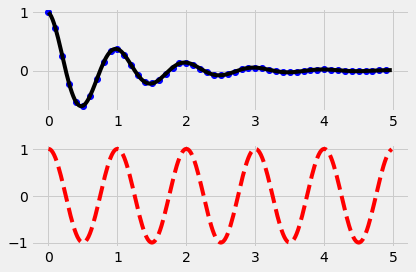

In [255]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2,1,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The `~.pyplot.figure` call here is optional because
``figure(1)`` will be created by default, just as a ``subplot(111)``
will be created by default if you don't manually specify any axes.  The
`~.pyplot.subplot` call specifies ``numrows,
numcols, plot_number`` where ``plot_number`` ranges from 1 to
``numrows*numcols``.  The commas in the ``subplot`` call are
optional if ``numrows*numcols<10``.  So ``subplot(211)`` is identical
to ``subplot(2, 1, 1)``.

You can create an arbitrary number of subplots
and axes.  If you want to place an axes manually, i.e., not on a
rectangular grid, use `~.pyplot.axes`,
which allows you to specify the location as ``axes([left, bottom,
width, height])`` where all values are in fractional (0 to 1)
coordinates. 


You can create multiple figures by using multiple
`~.pyplot.figure` calls with an increasing figure
number.  Of course, each figure can contain as many axes and subplots
as your heart desires::

    import matplotlib.pyplot as plt
    plt.figure(1)                # the first figure
    plt.subplot(211)             # the first subplot in the first figure
    plt.plot([1, 2, 3])
    plt.subplot(212)             # the second subplot in the first figure
    plt.plot([4, 5, 6])


    plt.figure(2)                # a second figure
    plt.plot([4, 5, 6])          # creates a subplot(111) by default

    plt.figure(1)                # figure 1 current; subplot(212) still current
    plt.subplot(211)             # make subplot(211) in figure1 current
    plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with `~.pyplot.clf`
and the current axes with `~.pyplot.cla`.  If you find
it annoying that states (specifically the current image, figure and axes)
are being maintained for you behind the scenes, don't despair: this is just a thin
stateful wrapper around an object oriented API, which you can use
instead (see :doc:`/tutorials/intermediate/artists`)

If you are making lots of figures, you need to be aware of one
more thing: the memory required for a figure is not completely
released until the figure is explicitly closed with
`~.pyplot.close`.  Deleting all references to the
figure, and/or using the window manager to kill the window in which
the figure appears on the screen, is not enough, because pyplot
maintains internal references until `~.pyplot.close`
is called.


Working with text
=================

`~.pyplot.text` can be used to add text in an arbitrary location, and
`~.pyplot.xlabel`, `~.pyplot.ylabel` and `~.pyplot.title` are used to add
text in the indicated locations (see :doc:`/tutorials/text/text_intro` for a
more detailed example)



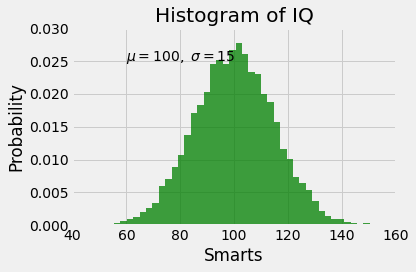

In [256]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the `~.pyplot.text` functions return a `matplotlib.text.Text`
instance.  Just as with with lines above, you can customize the properties by
passing keyword arguments into the text functions or using `~.pyplot.setp`::

  t = plt.xlabel('my data', fontsize=14, color='red')

These properties are covered in more detail in :doc:`/tutorials/text/text_props`.


Using mathematical expressions in text
--------------------------------------

matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs::

    plt.title(r'$\sigma_i=15$')

The ``r`` preceding the title string is important -- it signifies
that the string is a *raw* string and not to treat backslashes as
python escapes.  matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts -- for details see
:doc:`/tutorials/text/mathtext`.  Thus you can use mathematical text across platforms
without requiring a TeX installation.  For those who have LaTeX and
dvipng installed, you can also use LaTeX to format your text and
incorporate the output directly into your display figures or saved
postscript -- see :doc:`/tutorials/text/usetex`.


Annotating text
---------------

The uses of the basic `~.pyplot.text` function above
place text at an arbitrary position on the Axes.  A common use for
text is to annotate some feature of the plot, and the
`~.pyplot.annotate` method provides helper
functionality to make annotations easy.  In an annotation, there are
two points to consider: the location being annotated represented by
the argument ``xy`` and the location of the text ``xytext``.  Both of
these arguments are ``(x, y)`` tuples.



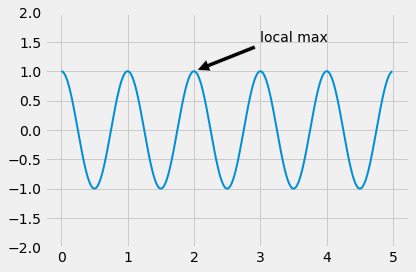

In [260]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

In this basic example, both the ``xy`` (arrow tip) and ``xytext``
locations (text location) are in data coordinates.  There are a
variety of other coordinate systems one can choose -- see
`annotations-tutorial` and `plotting-guide-annotation` for
details.  More examples can be found in
:doc:`/gallery/text_labels_and_annotations/annotation_demo`.


Logarithmic and other nonlinear axes
====================================

`matplotlib.pyplot` supports not only linear axis scales, but also
logarithmic and logit scales. This is commonly used if data spans many orders
of magnitude. Changing the scale of an axis is easy:

    plt.xscale('log')

An example of four plots with the same data and different scales for the y axis
is shown below.



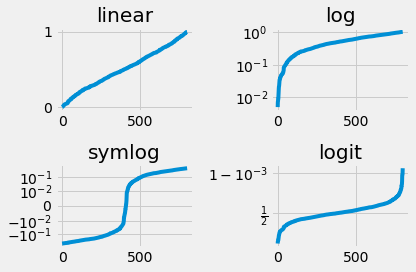

In [258]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()